In [1]:
import pandas as pd
import json
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Notebook criado para gerar as matrizes de confusão

In [2]:
with open('test_out.txt') as f:
    first_line = f.readline()
classes = json.loads(first_line[1:-1])  
print(classes)

['Rap_Hip_Hop', 'Pop', 'Rock_Pop/Rock_Rock_Alternativo', 'Pagode_Samba', 'Gospel/Religioso', 'MPB_Bossa_Nova', 'Regional_Sertanejo_Forró_Country', 'Funk_Carioca']


In [3]:
dict_classes = {}
for i in range(len(classes)):
    dict_classes[i] = classes[i]
dict_classes

{0: 'Rap_Hip_Hop',
 1: 'Pop',
 2: 'Rock_Pop/Rock_Rock_Alternativo',
 3: 'Pagode_Samba',
 4: 'Gospel/Religioso',
 5: 'MPB_Bossa_Nova',
 6: 'Regional_Sertanejo_Forró_Country',
 7: 'Funk_Carioca'}

In [4]:
df_test_out = pd.read_csv('test_out.txt', sep ='\t', skiprows = [0])

df_test_out = df_test_out.replace({"predicted": dict_classes})
df_test_out = df_test_out.replace({"actual": dict_classes})
df_test_out = df_test_out.drop(columns = ['scores_str'], axis =1)
df_test_out[0:5]

,predicted,actual,text
0,Regional_Sertanejo_Forró_Country,Regional_Sertanejo_Forró_Country,ô ô ô ô quando eu tô de lua eu danço e não me...
1,Regional_Sertanejo_Forró_Country,MPB_Bossa_Nova,você me chama e eu sempre volto pros seus braç...
2,Regional_Sertanejo_Forró_Country,Regional_Sertanejo_Forró_Country,canoa foi rio acima canoa não volta mais foi s...
3,Regional_Sertanejo_Forró_Country,Regional_Sertanejo_Forró_Country,mais de mil vezes disse que não mais seu olhar...
4,Pagode_Samba,Pagode_Samba,intro dm g7 c7 c6 am7 b7 em7 b7d acho que a s...


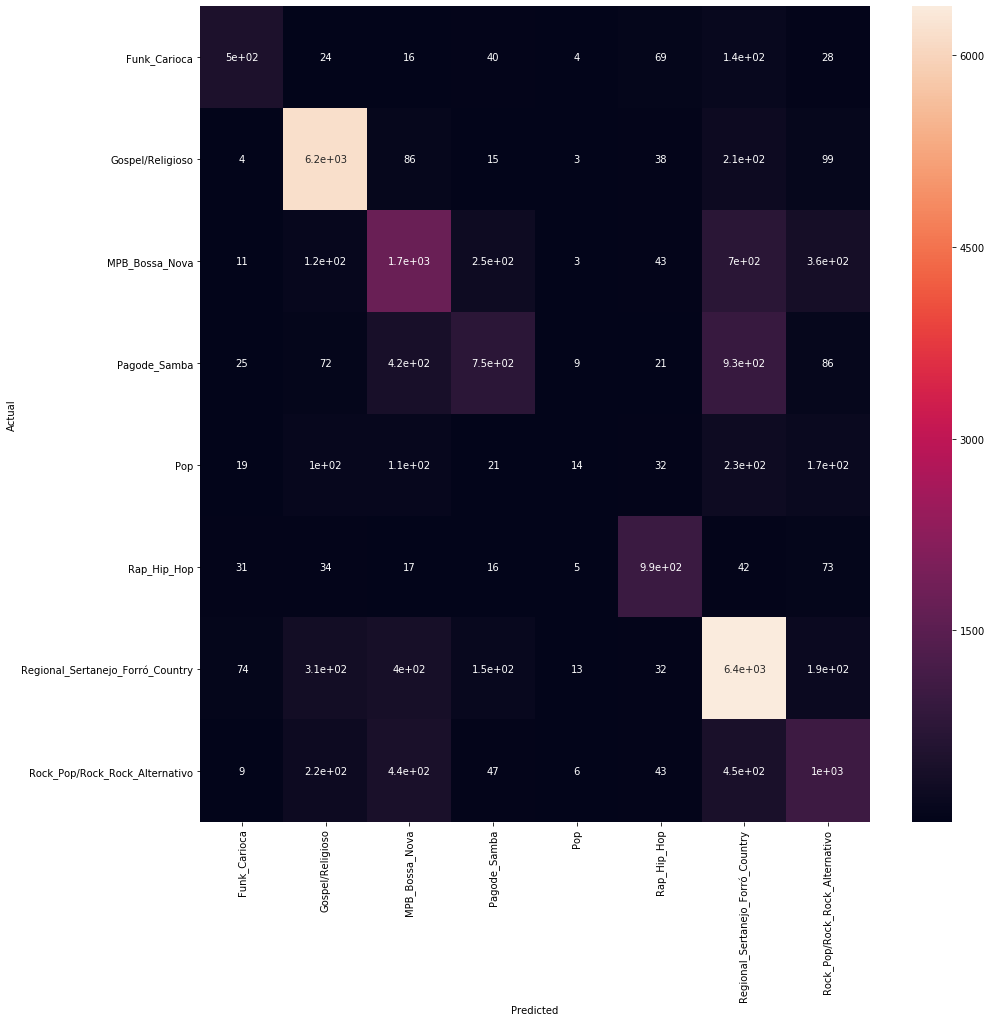

In [6]:
confusion_matrix = pd.crosstab(df_test_out['actual'], df_test_out['predicted'], rownames=['Actual'],\
                               colnames=['Predicted'], margins = False)

plt.figure(figsize=(15,15))
sn.heatmap(confusion_matrix, annot=True)


In [7]:
confusion_matrix

Predicted,Funk_Carioca,Gospel/Religioso,MPB_Bossa_Nova,Pagode_Samba,Pop,Rap_Hip_Hop,Regional_Sertanejo_Forró_Country,Rock_Pop/Rock_Rock_Alternativo
Actual,,,,,,,,
Funk_Carioca,496,24,16,40,4,69,145,28
Gospel/Religioso,4,6159,86,15,3,38,206,99
MPB_Bossa_Nova,11,122,1725,246,3,43,703,365
Pagode_Samba,25,72,417,747,9,21,930,86
Pop,19,103,106,21,14,32,230,171
Rap_Hip_Hop,31,34,17,16,5,987,42,73
Regional_Sertanejo_Forró_Country,74,307,397,147,13,32,6382,188
Rock_Pop/Rock_Rock_Alternativo,9,222,440,47,6,43,446,1027


In [9]:
confusion_matrix.to_csv('confusion_matrix.csv')